# Preprocesamiento

In [ ]:
# Instalar paqueterias
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# We download de csv file from aws in order to does not store it on Google Drive
url = 'https://test-manuelromero-0001.s3.amazonaws.com/hepatitis_csv.csv'
df = pd.read_csv(url)

In [ ]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,46.0,200.0,4.0,80.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,120.0,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,50.0,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,50.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
# We select the numerical columns thus we obtain a numerical dataset
columnas = ['bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin']

In [ ]:
df_numeric = df[columnas]

In [ ]:
# We can notice that there are not enoght NaN values to drop thus, we fill
df_numeric.isna().sum() / df_numeric.sum()

bilirubin        0.028209
alk_phosphate    0.002185
sgot             0.000308
albumin          0.030155
dtype: float64

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# The forward fill was randomly choosen by me xD
df_numeric = df_numeric.fillna(method='ffill') 

# K means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
escalador = StandardScaler()
datos_ajustados = escalador.fit_transform(df_numeric)

In [ ]:
model_kmeans = KMeans(
    init = 'random',
    n_clusters=2, 
    max_iter = 1000,
    random_state=42
)

In [ ]:
model_kmeans.fit(df_numeric)

KMeans(init='random', max_iter=1000, n_clusters=2, random_state=42)

In [ ]:
def evaluar_modelo(datos,modelo):
  try:
    return silhouette_score(datos,modelo.labels_)
  except AttributeError:
    print("No se puede evaluar")
  

In [ ]:
evaluar_modelo(df_numeric,model_kmeans)

0.5829880751967215

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model_dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
model_dbscan.fit(datos_ajustados)

DBSCAN()

In [ ]:
evaluar_modelo(datos_ajustados,model_dbscan)

0.20076114568116432

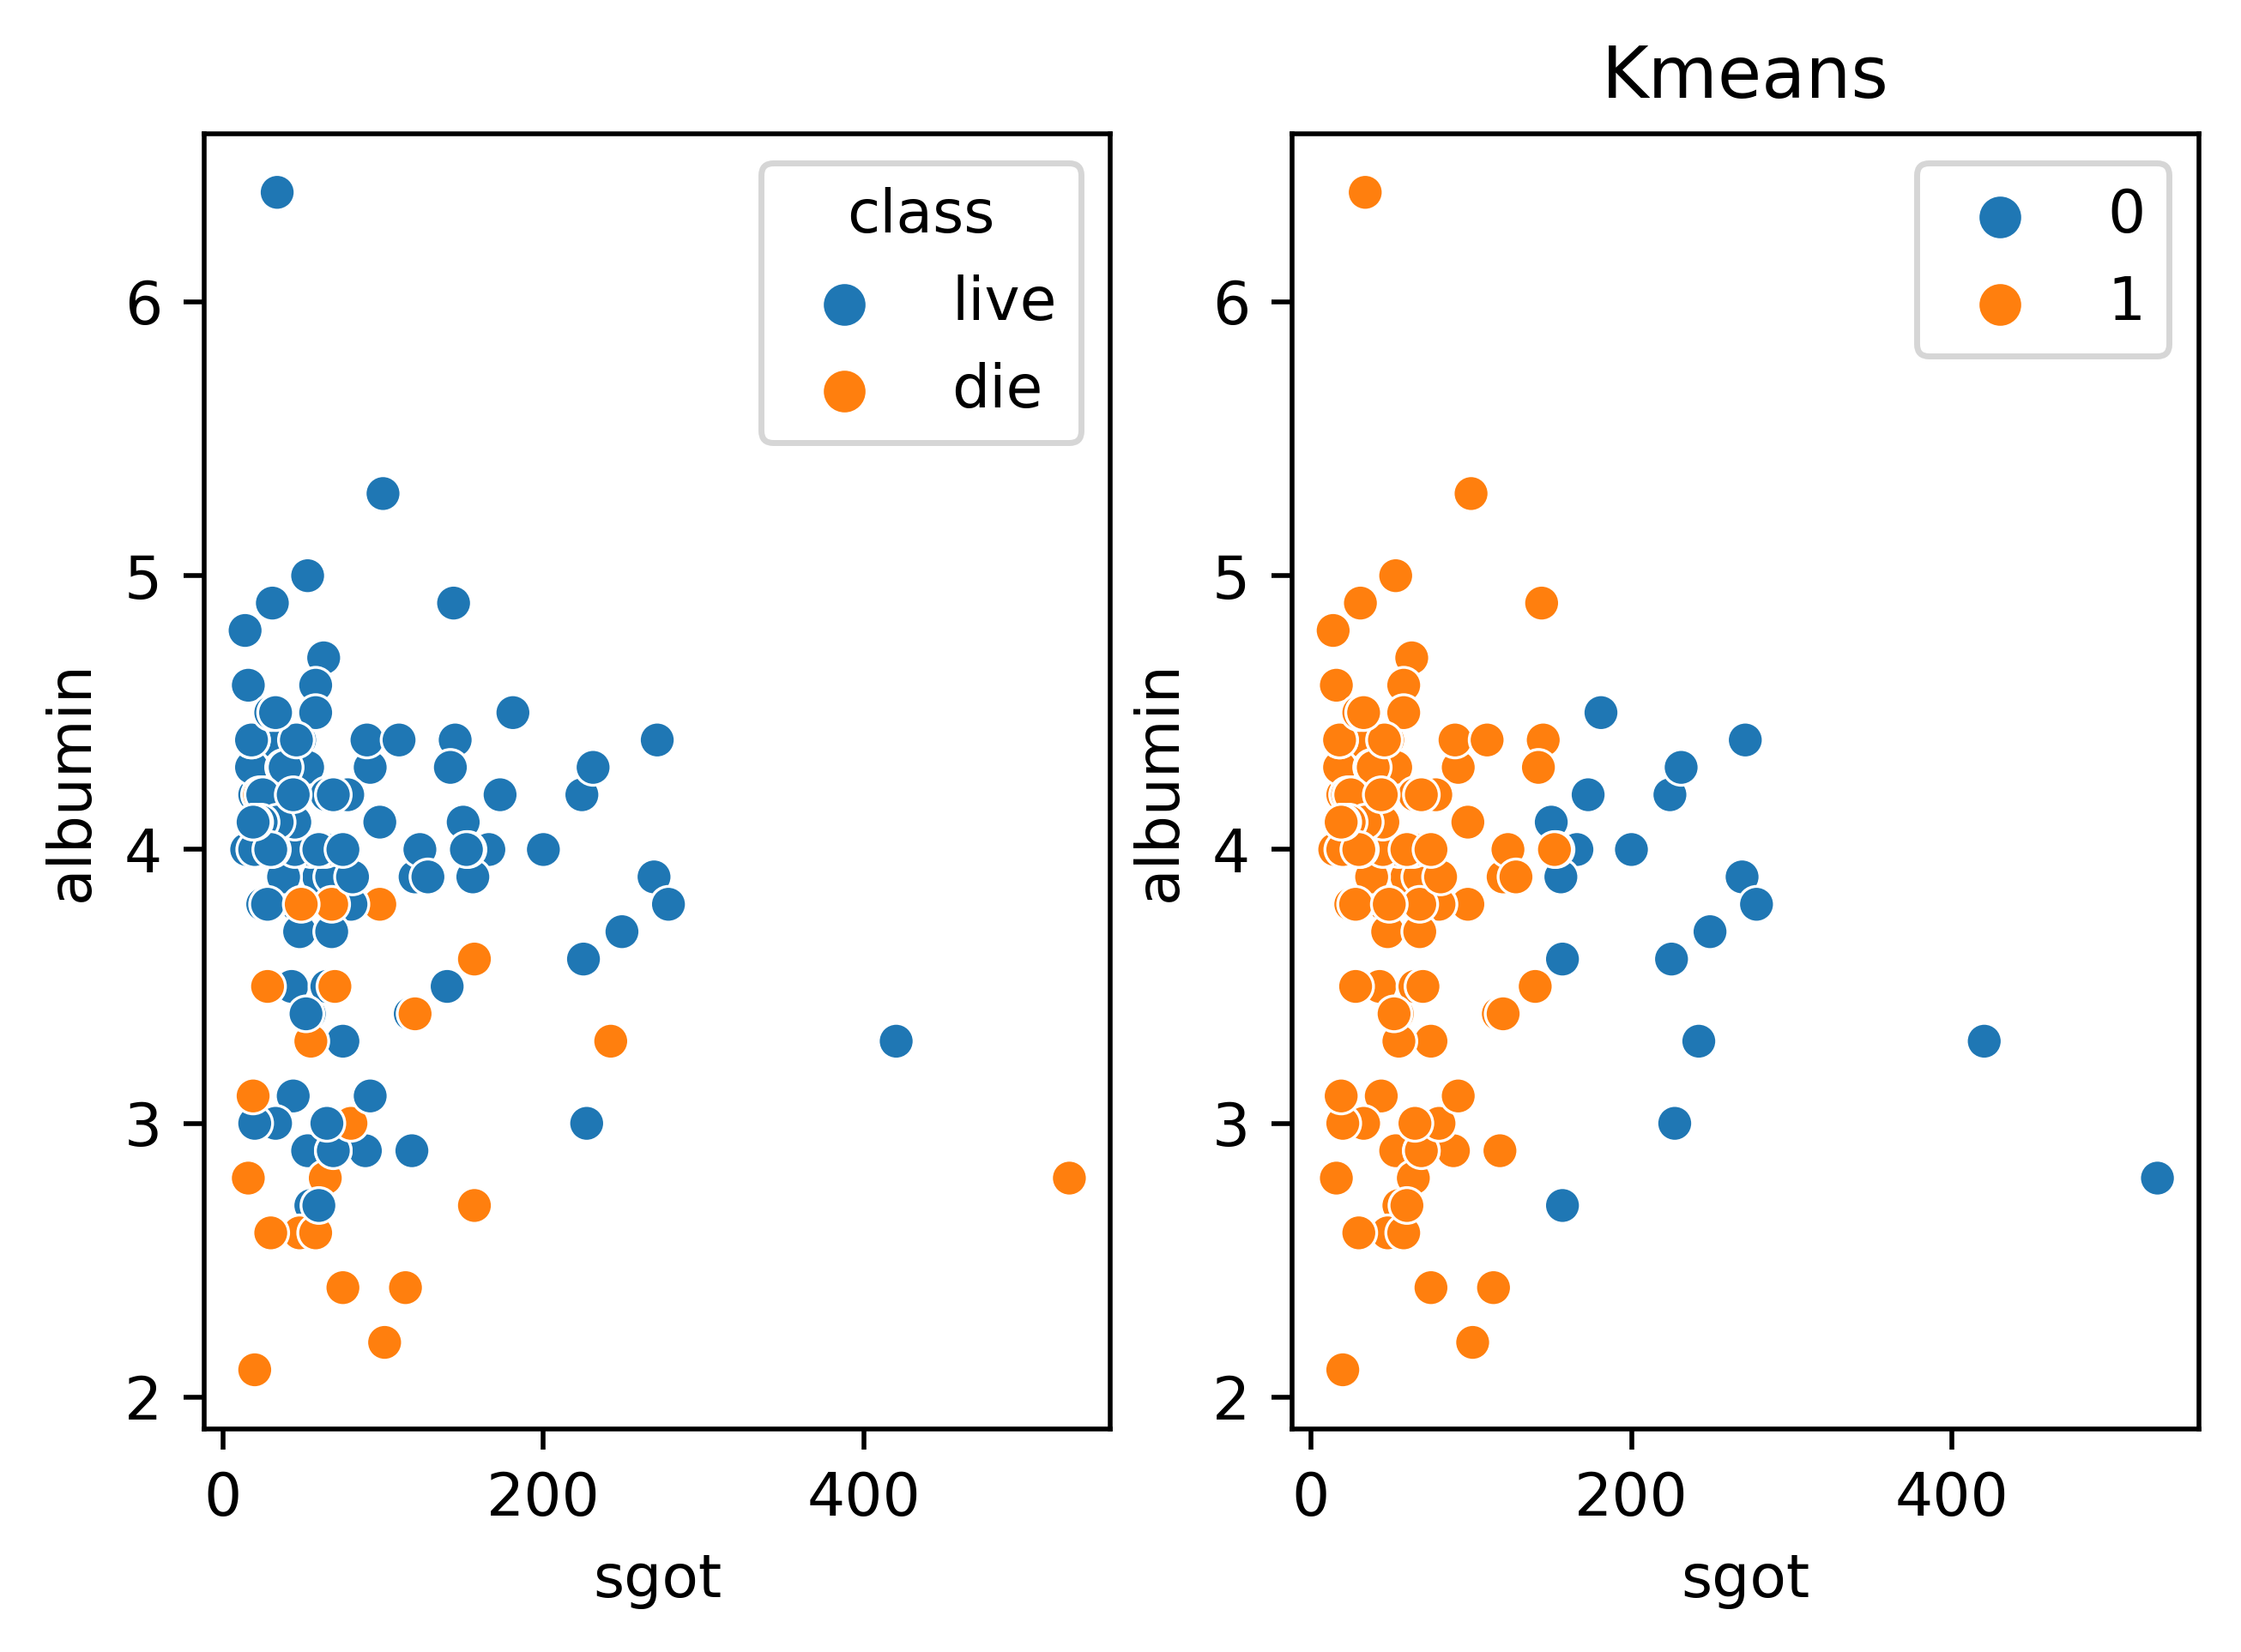

In [ ]:
fig, axes = plt.subplots(1,2,dpi=500)
sns.scatterplot(x='sgot',y='albumin',hue ='class',data=df,ax=axes[0] )
sns.scatterplot(x='sgot',y='albumin',hue =model_kmeans.labels_,data=df,ax=axes[1] )
plt.title("Kmeans")
plt.show()

# Cluster jerarquico - David 

In [ ]:
import scipy.stats 
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

In [ ]:
df_1 = df.drop(columns=["sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders",
                "ascites", "varices", "class", "age", "protime", "histology" ])

In [ ]:
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df_1.fillna(method='ffill',inplace=True)

In [ ]:
data_scaled = normalize(df_1)
data_scaled = pd.DataFrame(data_scaled, columns=df_1.columns)
data_scaled.head()

,bilirubin,alk_phosphate,sgot,albumin
0,0.011497,0.977205,0.206938,0.045986
1,0.006364,0.954545,0.296970,0.024747
2,0.006912,0.947920,0.315973,0.039497
3,0.010065,0.661443,0.747719,0.057517
4,0.004872,0.224102,0.974359,0.019487


### Cluster = 2, Metrica = Distancia euclidiana, Metodo = Ward

In [ ]:
X = data_scaled

hac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

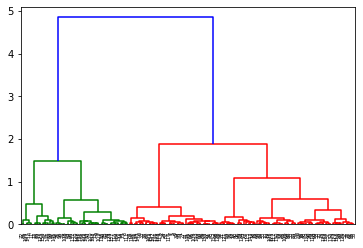

In [ ]:
hac.fit(X)
deandro = sch.dendrogram(sch.linkage(X, method="ward", metric="euclidean"))

In [ ]:
membership = hac.labels_
membership

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0])

In [ ]:
silhouette_score(X, membership)

0.6380579987830948

Text(0.5, 1.0, 'Clusters = 2, metrica ecludiana')

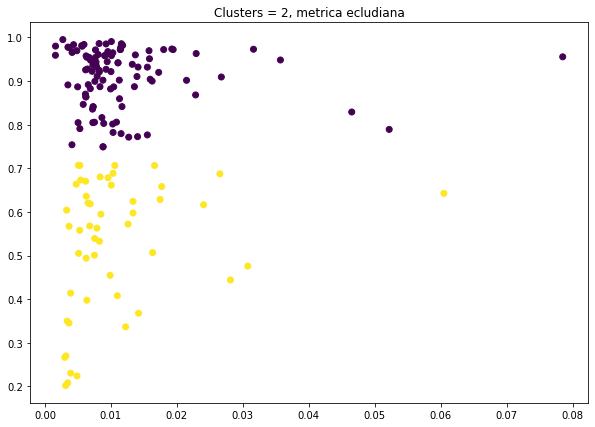

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['bilirubin'], data_scaled['alk_phosphate'], c=membership) 
plt.title("Clusters = 2, metrica ecludiana")

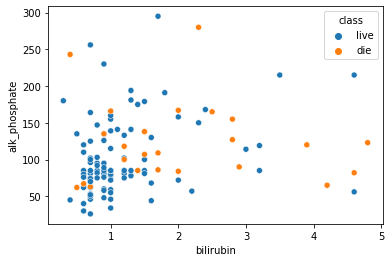

In [ ]:
sns.scatterplot(data=df, y="alk_phosphate", x = "bilirubin", hue="class")

### Cluster = 2, Metrica = Manhattan, Metodo = Completo

In [ ]:
X = data_scaled
hac_1 = AgglomerativeClustering(n_clusters=2, affinity="manhattan", linkage="complete")

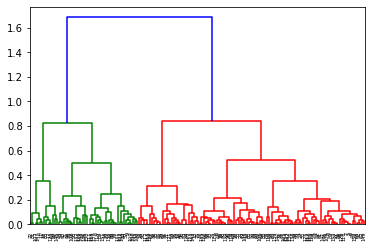

In [ ]:
hac_1.fit(X)
deandro = sch.dendrogram(sch.linkage(X, method="complete", metric="cityblock"))

In [ ]:
membership_1 = hac_1.labels_
membership_1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0])

In [ ]:
silhouette_score(X, membership_1)

0.6380579987830948

Text(0.5, 1.0, 'Clusters = 2, metrica de manhattan')

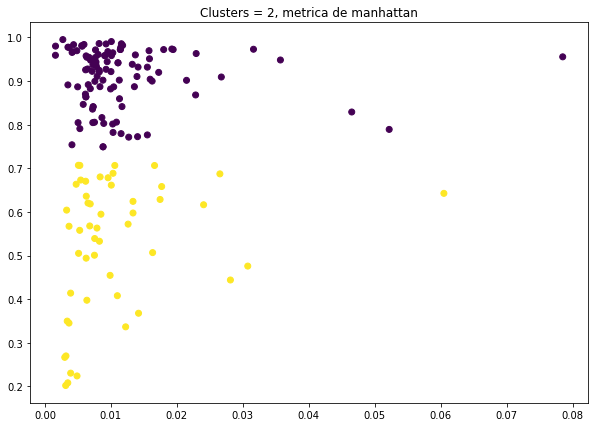

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['bilirubin'], data_scaled['alk_phosphate'], c=membership_1) 
plt.title("Clusters = 2, metrica de manhattan")

# Red Bayesiana - Evelyn 

In [ ]:
# Importr paqueterias
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
model_bayes = BayesianModel([('bilirubin', 'class'),
                       ('alk_phosphate', 'class'),
                       ('class', 'sgot'),
                       ('class', 'albumin')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
print(model_bayes)

BayesianModel with 5 nodes and 4 edges


In [ ]:
model_bayes.nodes()

NodeView(('bilirubin', 'class', 'alk_phosphate', 'sgot', 'albumin'))

In [ ]:
model_bayes.fit(df, estimator=MaximumLikelihoodEstimator)

In [ ]:
model_bayes

In [ ]:
print(model_bayes.get_cpds('bilirubin'))

+----------------+------------+
| bilirubin(0.3) | 0.00657895 |
+----------------+------------+
| bilirubin(0.4) | 0.0131579  |
+----------------+------------+
| bilirubin(0.5) | 0.0131579  |
+----------------+------------+
| bilirubin(0.6) | 0.0657895  |
+----------------+------------+
| bilirubin(0.7) | 0.151316   |
+----------------+------------+
| bilirubin(0.8) | 0.0723684  |
+----------------+------------+
| bilirubin(0.9) | 0.0855263  |
+----------------+------------+
| bilirubin(1.0) | 0.190789   |
+----------------+------------+
| bilirubin(1.1) | 0.00657895 |
+----------------+------------+
| bilirubin(1.2) | 0.0526316  |
+----------------+------------+
| bilirubin(1.3) | 0.0394737  |
+----------------+------------+
| bilirubin(1.4) | 0.0131579  |
+----------------+------------+
| bilirubin(1.5) | 0.0460526  |
+----------------+------------+
| bilirubin(1.6) | 0.0197368  |
+----------------+------------+
| bilirubin(1.7) | 0.0197368  |
+----------------+------------+
| biliru

In [ ]:
from pgmpy.inference import VariableElimination
df_infer = VariableElimination(model_bayes)

In [ ]:
q = df_infer.query(variables=['class'], evidence={'bilirubin': 7.6})
print(q)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-------------+--------------+
| class       |   phi(class) |
+=============+==============+
| class(die)  |       0.5132 |
+-------------+--------------+
| class(live) |       0.4868 |
+-------------+--------------+


# Comparar modelos

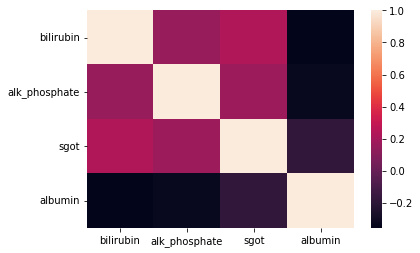

In [ ]:
# We will use the most important features in order to classify if a patient
# lives or dies
sns.heatmap(df_numeric.corr())

In [ ]:
def plotear_modelos(feature_1,feature_2,calidad = 50):
  fig, axes = plt.subplots(1,5,sharex=True,sharey=True,figsize=(18,4),dpi=calidad)
  # This is the good one
  sns.scatterplot(x=feature_1,y=feature_2,hue='class', data=df,ax = axes[0])
  axes[0].set_title("Datos originales")
  # Using the models
  axes[1].set_title("KMEANS")
  sns.scatterplot(x=feature_1,y=feature_2,
                  hue = model_kmeans.labels_, data=df,ax = axes[1])
  axes[2].set_title("DBSCAN")
  sns.scatterplot(x=feature_1,y=feature_2,
                  hue = model_dbscan.labels_, data=df,ax = axes[2])
  axes[3].set_title("Cluster Jerarquico")
  sns.scatterplot(x=feature_1,y=feature_2,
                  hue = hac.labels_, data=df,ax = axes[3])
  axes[4].set_title("Red Bayesiana")
  sns.scatterplot(x=feature_1,y=feature_2,
                  hue = model_bayes.get_cpds, data=df,ax = axes[4])
  
  
  plt.show()

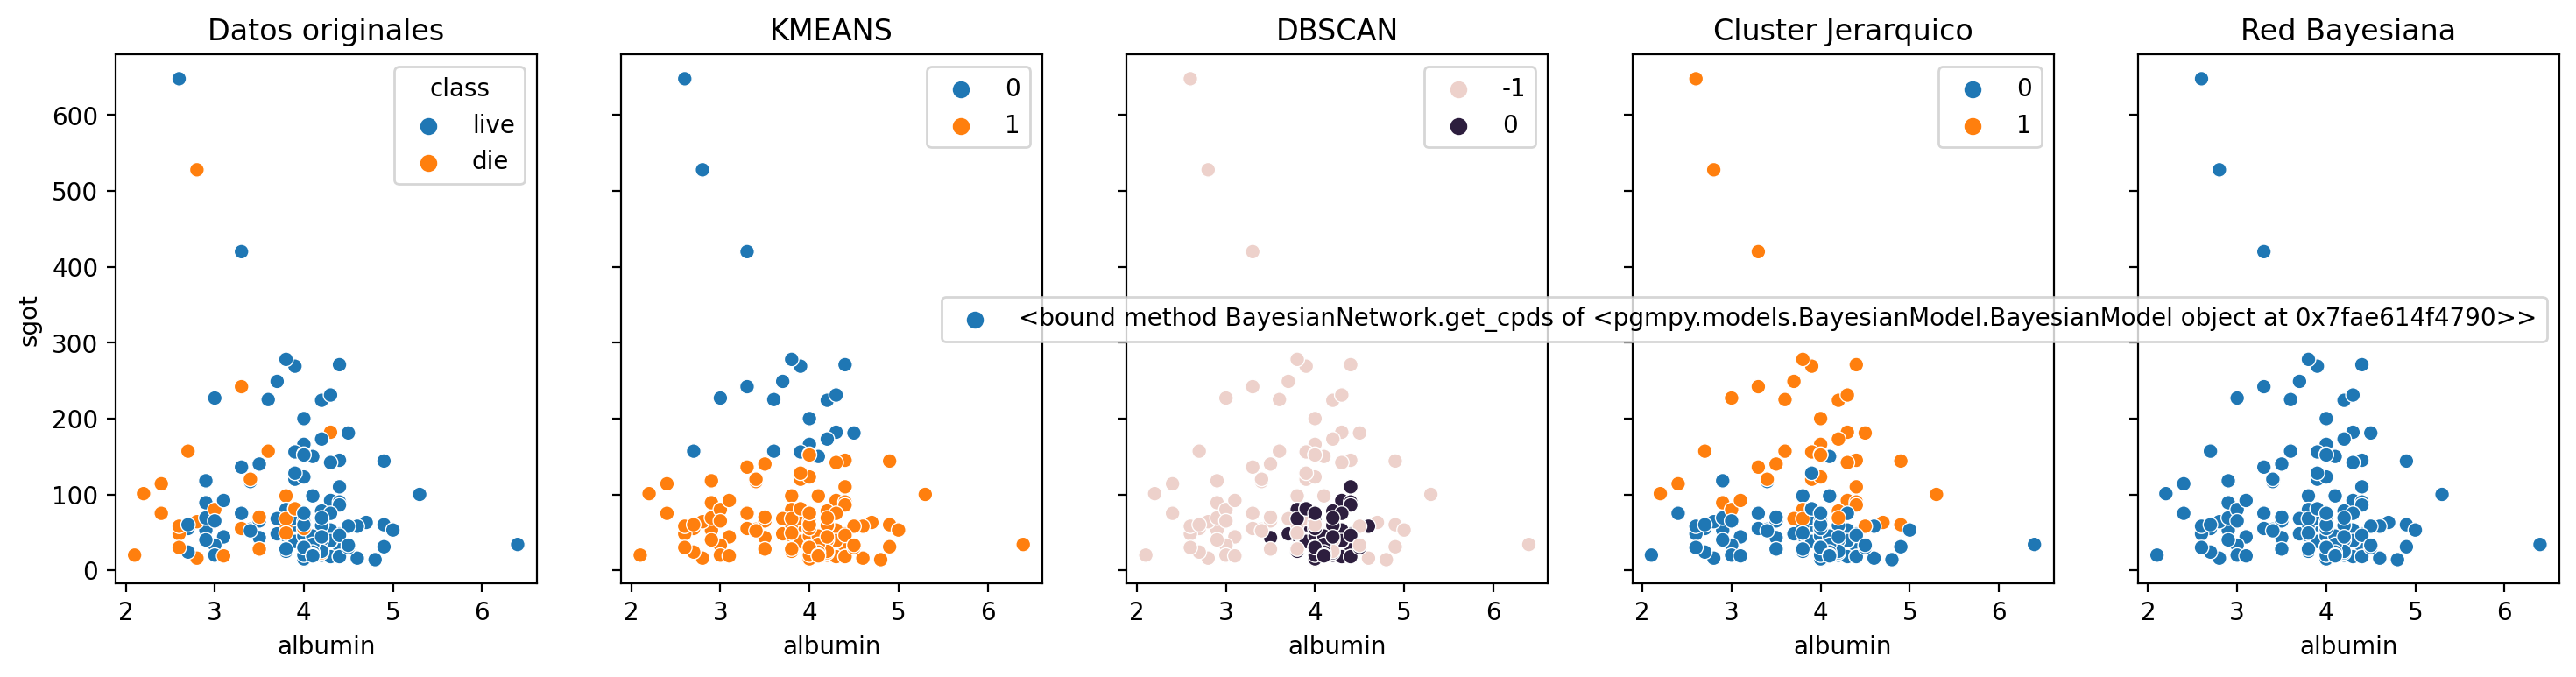

In [ ]:
plotear_modelos('albumin','sgot',calidad=200)

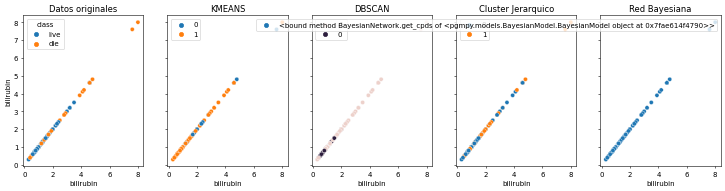

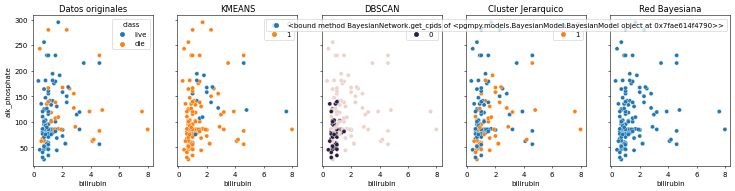

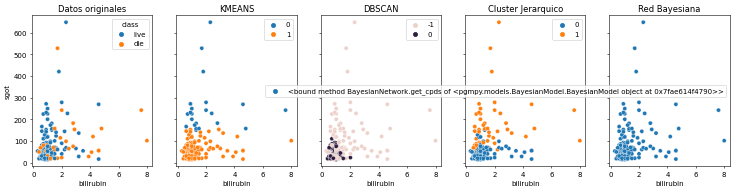

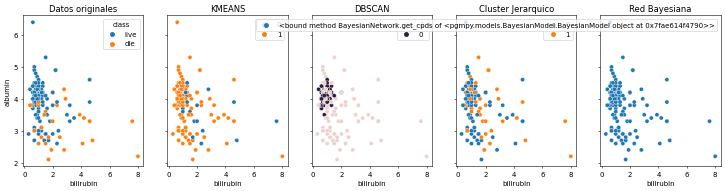

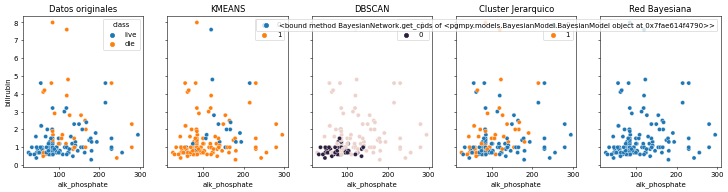

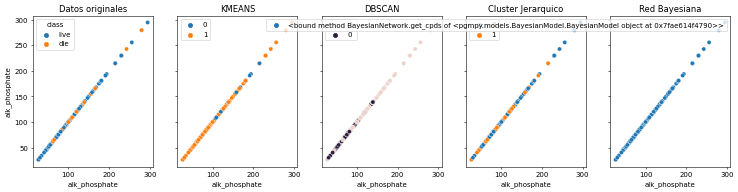

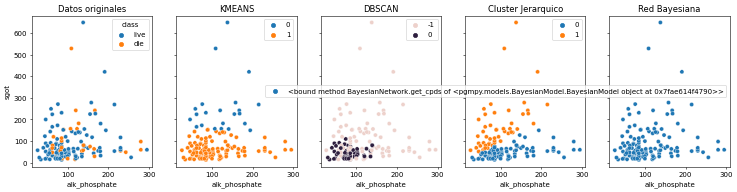

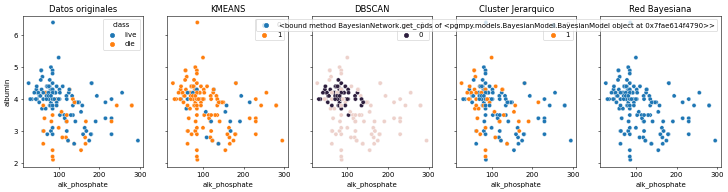

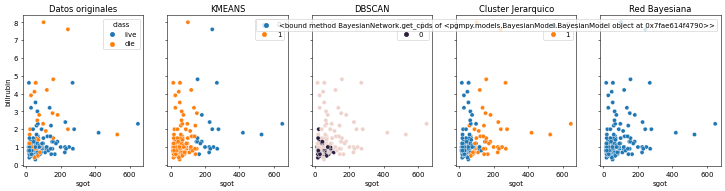

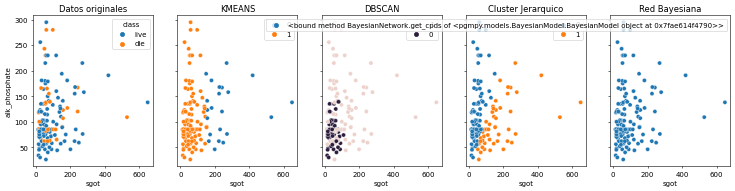

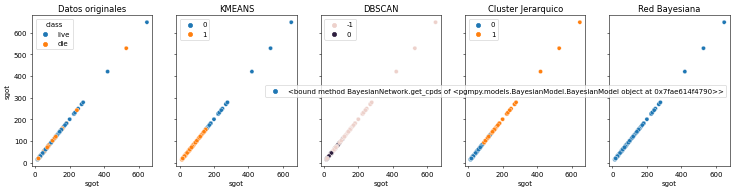

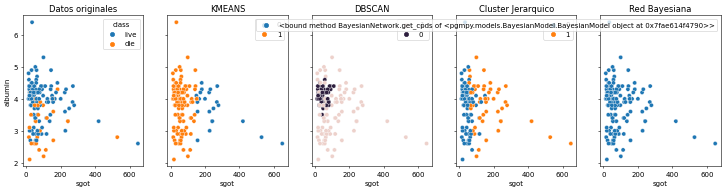

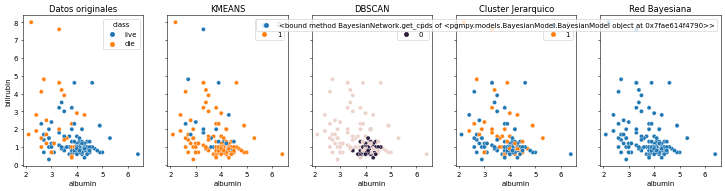

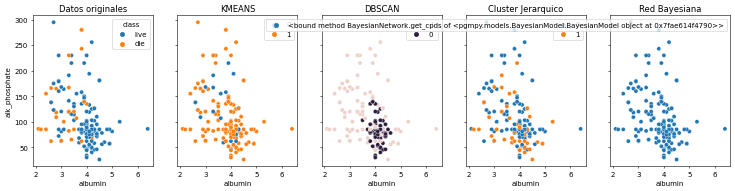

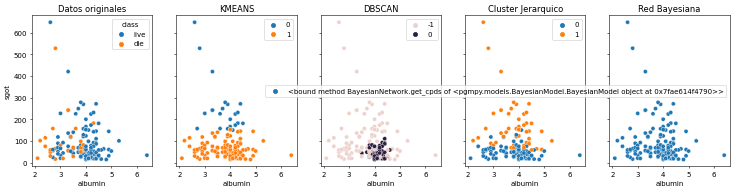

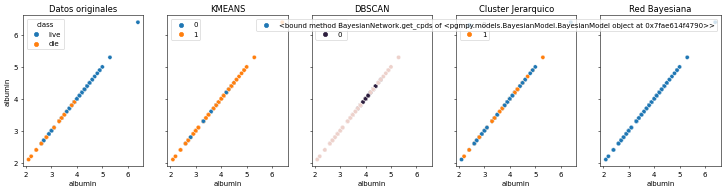

In [ ]:
for i in df_numeric.columns.to_list():
  for j in df_numeric.columns.to_list():
    plotear_modelos(i,j)